In [1]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\User\Downloads\patient_health.csv"
df = pd.read_csv(file_path)

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils.class_weight import compute_sample_weight

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


EXPLORATORY ANALYSIS

In [3]:
# Preview the dataset
print(df.head())

   PatientID   Age Gender     Diagnosis AppointmentDate         Outcome  \
0          1  43.0      M        Asthma      01/01/2024  Did Not Attend   
1          2  42.0      F      Diabetes      02/01/2024        Attended   
2          3  57.0      M      Diabetes      03/01/2024        Attended   
3          4  76.0      F  Hypertension      04/01/2024        Attended   
4          5  63.0      F        Asthma      05/01/2024        Attended   

  GPPractice  
0       C789  
1       A123  
2       D012  
3       E345  
4       C789  


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PatientID        5000 non-null   int64  
 1   Age              4997 non-null   float64
 2   Gender           4997 non-null   object 
 3   Diagnosis        4999 non-null   object 
 4   AppointmentDate  4998 non-null   object 
 5   Outcome          4998 non-null   object 
 6   GPPractice       4999 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


In [5]:
#Statistical Summary for Numeric Columns
print("\nStatistical Summary (Numeric Columns):")
print(df.describe())



Statistical Summary (Numeric Columns):
         PatientID          Age
count  5000.000000  4997.000000
mean   2500.500000    53.320392
std    1443.520003    20.765649
min       1.000000    18.000000
25%    1250.750000    35.000000
50%    2500.500000    53.000000
75%    3750.250000    72.000000
max    5000.000000    89.000000


In [6]:
#Unique Values in Categorical Columns
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")


Unique Values in Categorical Columns:
Gender: ['M' 'F' nan]
Diagnosis: ['Asthma' 'Diabetes' 'Hypertension' nan]
AppointmentDate: ['01/01/2024' '02/01/2024' '03/01/2024' ... '13 06 2025' '03 04 2026'
 '24 08 2025']
Outcome: ['Did Not Attend' 'Attended' 'Attend' 'DidNotAttend' 'DNA' nan]
GPPractice: ['C789' 'A123' 'D012' 'E345' 'B456' nan]


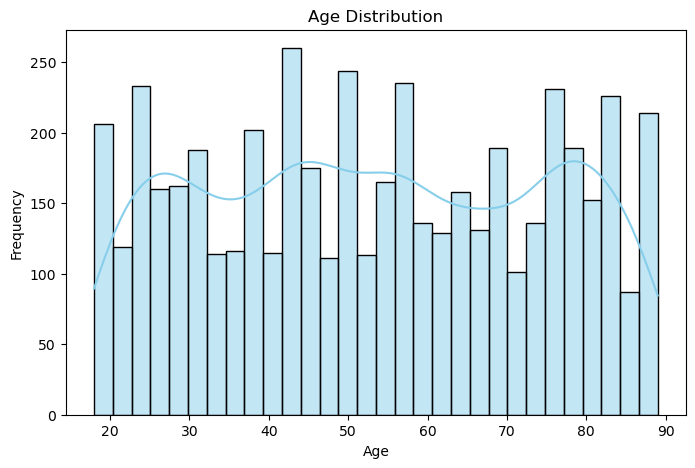

✅ Chart saved as 'images/Age_Distribution.png'


In [7]:
#Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
##Save and show
file_name = 'Age_Distribution'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")

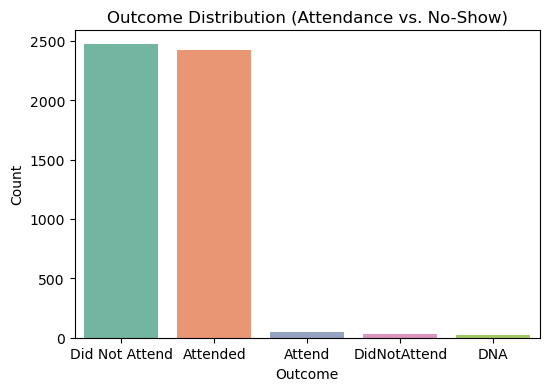

✅ Chart saved as 'images/Outcome_Distribution.png'


In [8]:
#Outcome Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='Set2')
plt.title('Outcome Distribution (Attendance vs. No-Show)')
plt.xlabel('Outcome')
plt.ylabel('Count')
#Save and show
file_name = 'Outcome Distribution'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")

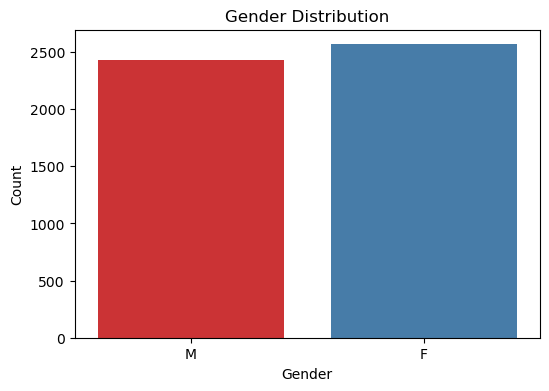

✅ Chart saved as 'images/Gender_Distribution.png'


In [9]:
#  Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
#Save and show
file_name = 'Gender Distribution'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")


DATA CLEANING

In [10]:
#Check for missing values
print("\nColumn-wise Missing Values:")
print(df.isnull().sum())


Column-wise Missing Values:
PatientID          0
Age                3
Gender             3
Diagnosis          1
AppointmentDate    2
Outcome            2
GPPractice         1
dtype: int64


In [11]:
#Check for Duplicate Records
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


In [12]:
#Data Type of AppointmentDate and Invalid Dates
try:
    # Convert 'AppointmentDate' to datetime format
    df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'], errors='coerce')
    
    # Count invalid dates (will be NaT if conversion failed)
    invalid_dates = df['AppointmentDate'].isnull().sum()
    
    print(f"\nInvalid Appointment Dates: {invalid_dates}")
    
except Exception as e:
    print(f"Error parsing dates: {e}")


Invalid Appointment Dates: 2


C:\Users\User\AppData\Local\Temp\ipykernel_25236\402323046.py:4: UserWarning: Parsing '13/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_25236\402323046.py:4: UserWarning: Parsing '14/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_25236\402323046.py:4: UserWarning: Parsing '15/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_25236\402323046.py:4: UserWarning: Parsing '16/01/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_f

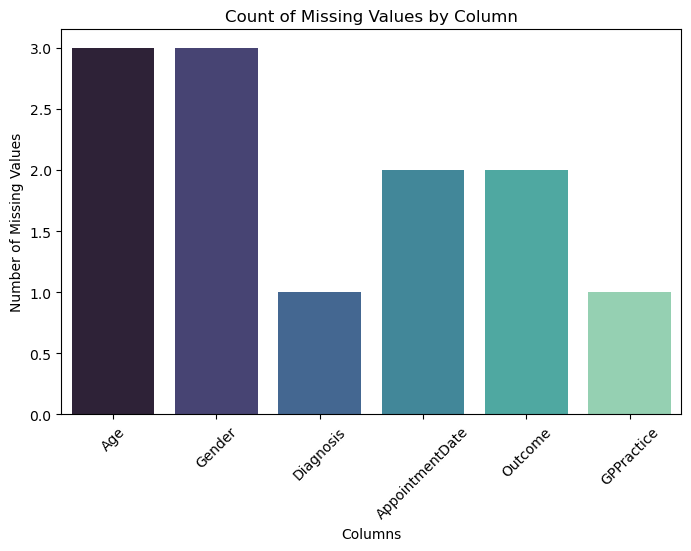

✅ Chart saved as 'images/Missing_Data.png'


In [13]:
#Visualize Missing Data
import matplotlib.pyplot as plt
import seaborn as sns

# Count missing values
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="mako")
plt.title('Count of Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
#Save and show
file_name = 'Missing Data'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")

In [14]:
#  Check for Invalid Ages (e.g., negative values)
print("\nInvalid Age Entries:")
print(df[df['Age'] < 0])


Invalid Age Entries:
Empty DataFrame
Columns: [PatientID, Age, Gender, Diagnosis, AppointmentDate, Outcome, GPPractice]
Index: []


In [15]:

#Handling Missing Data ###

# Check for missing values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

# Impute missing Age with median (reasonable for numerical data)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing Gender with the mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Replace missing Diagnosis with 'Unknown'
df['Diagnosis'].fillna('Unknown', inplace=True)

# Drop rows where critical information is missing (AppointmentDate, Outcome)
df.dropna(subset=['AppointmentDate', 'Outcome'], inplace=True)

# Impute missing GPPractice with the mode (most frequent value)
df['GPPractice'].fillna(df['GPPractice'].mode()[0], inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
PatientID          0
Age                3
Gender             3
Diagnosis          1
AppointmentDate    2
Outcome            2
GPPractice         1
dtype: int64

Missing Values After Cleaning:
PatientID          0
Age                0
Gender             0
Diagnosis          0
AppointmentDate    0
Outcome            0
GPPractice         0
dtype: int64


In [16]:
# Convert AppointmentDate to datetime format
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'], format='%d/%m/%Y', errors='coerce')

# Drop rows with invalid AppointmentDate (those that couldn't be converted)
df.dropna(subset=['AppointmentDate'], inplace=True)

print("\nCheck for Invalid Dates (After Conversion):")
print(df['AppointmentDate'].isnull().sum())




Check for Invalid Dates (After Conversion):
0


In [17]:
#Standardize Categorical Fields ###

# Standardize Outcome (e.g., 'Did Not Attend' -> 'Did Not Attend')
df['Outcome'] = df['Outcome'].str.strip().str.title()

# Standardize Gender (e.g., 'Male', 'Female')
df['Gender'] = df['Gender'].str.strip().str.title()

# Verify cleaned Outcome and Gender
print("\nUnique Outcomes After Cleaning:", df['Outcome'].unique())
print("Unique Genders After Cleaning:", df['Gender'].unique())


Unique Outcomes After Cleaning: ['Did Not Attend' 'Attended' 'Attend' 'Didnotattend' 'Dna']
Unique Genders After Cleaning: ['M' 'F']


In [18]:
#Handle Inconsistent Data (e.g., Negative Ages) ###

# Remove rows where Age is negative or unreasonable (e.g., >120)
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]

print("\nCheck for Invalid Ages (After Cleaning):")
print(df[df['Age'] < 0])


Check for Invalid Ages (After Cleaning):
Empty DataFrame
Columns: [PatientID, Age, Gender, Diagnosis, AppointmentDate, Outcome, GPPractice]
Index: []


In [19]:
df_cleaned = df.copy()

In [20]:
 print(df_cleaned.head())

   PatientID   Age Gender     Diagnosis AppointmentDate         Outcome  \
0          1  43.0      M        Asthma      2024-01-01  Did Not Attend   
1          2  42.0      F      Diabetes      2024-02-01        Attended   
2          3  57.0      M      Diabetes      2024-03-01        Attended   
3          4  76.0      F  Hypertension      2024-04-01        Attended   
4          5  63.0      F        Asthma      2024-05-01        Attended   

  GPPractice  
0       C789  
1       A123  
2       D012  
3       E345  
4       C789  


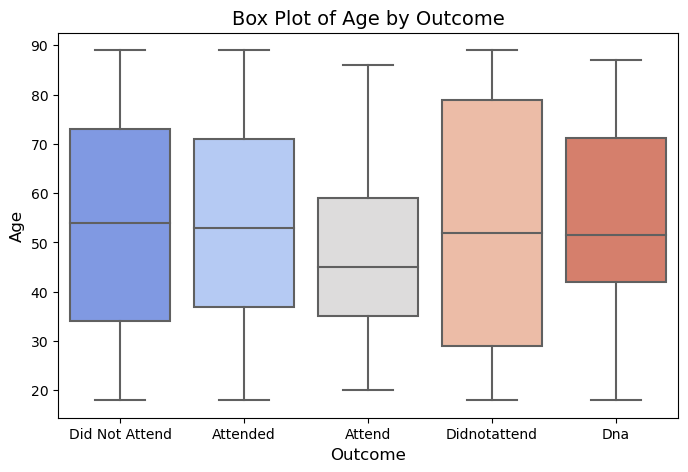

✅ Chart saved as 'images/Box_Plot_Age_by_Outcome.png'


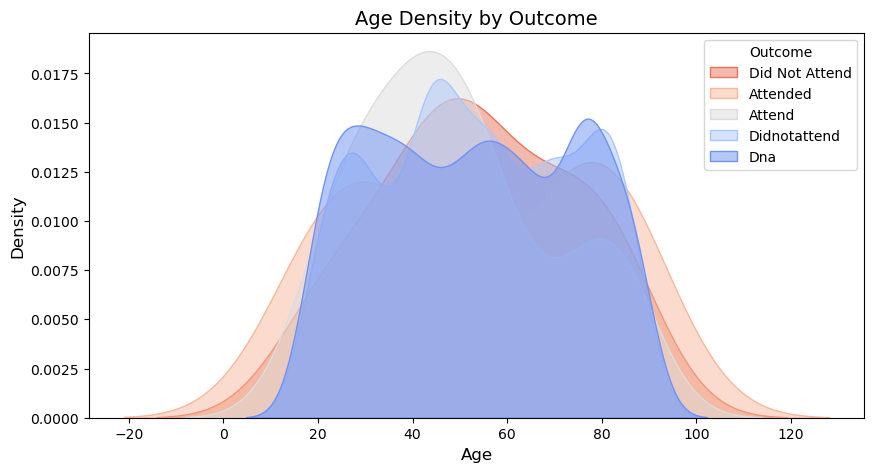

✅ Chart saved as 'images/(KDE)_by_Outcome.png'


In [21]:


## ---- PLOT 2: Box Plot by Outcome ----
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Age', data=df_cleaned, palette='coolwarm')

plt.xlabel("Outcome", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Box Plot of Age by Outcome", fontsize=14)

#Save and show
file_name = 'Box Plot Age by Outcome'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")

## ---- PLOT 3: Density Plot (KDE) by Outcome ----
# KDE Density Plot Fix
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Age', hue='Outcome', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)

plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Density by Outcome", fontsize=14)
plt.legend(title="Outcome", labels=df['Outcome'].unique())  # Manually set legend

#Save and show
file_name = '(KDE) by Outcome'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")


Descriptive Statistics and Insights

In [22]:
# Calculate the No-Show Rate (Assuming 'Outcome' column contains 'Attended' and 'Did Not Attend')
no_show_rate = df_cleaned.groupby('GPPractice')['Outcome'].apply(lambda x: (x == 'Did Not Attend').mean())

# Convert to percentage
no_show_rate *= 100  

# Display results
print("No-Show Rate by GP Practice:\n", no_show_rate)
# Calculate the rate for each outcome by GPPractice
attended_rate = df_cleaned.groupby('GPPractice')['Outcome'].apply(lambda x: (x == 'Attended').mean()) * 100
did_not_attend_rate = df_cleaned.groupby('GPPractice')['Outcome'].apply(lambda x: (x == 'Did Not Attend').mean()) * 100
attend_rate = df_cleaned.groupby('GPPractice')['Outcome'].apply(lambda x: (x == 'Attend').mean()) * 100
did_not_attend_alt_rate = df_cleaned.groupby('GPPractice')['Outcome'].apply(lambda x: (x == 'DidNotAttend').mean()) * 100
dna_rate = df_cleaned.groupby('GPPractice')['Outcome'].apply(lambda x: (x == 'DNA').mean()) * 100

# Display results
print("Attended Rate by GP Practice:\n", attended_rate)
print("\nDid Not Attend Rate by GP Practice:\n", did_not_attend_rate)
print("\nAttend Rate by GP Practice:\n", attend_rate)
print("\nDidNotAttend Rate by GP Practice:\n", did_not_attend_alt_rate)
print("\nDNA Rate by GP Practice:\n", dna_rate)

No-Show Rate by GP Practice:
 GPPractice
A123    45.445445
B456    53.087558
C789    47.619048
D012    57.245632
E345    43.842365
Name: Outcome, dtype: float64
Attended Rate by GP Practice:
 GPPractice
A123    51.751752
B456    45.253456
C789    50.757576
D012    41.521069
E345    53.497537
Name: Outcome, dtype: float64

Did Not Attend Rate by GP Practice:
 GPPractice
A123    45.445445
B456    53.087558
C789    47.619048
D012    57.245632
E345    43.842365
Name: Outcome, dtype: float64

Attend Rate by GP Practice:
 GPPractice
A123    1.401401
B456    0.552995
C789    0.649351
D012    0.308325
E345    1.576355
Name: Outcome, dtype: float64

DidNotAttend Rate by GP Practice:
 GPPractice
A123    0.0
B456    0.0
C789    0.0
D012    0.0
E345    0.0
Name: Outcome, dtype: float64

DNA Rate by GP Practice:
 GPPractice
A123    0.0
B456    0.0
C789    0.0
D012    0.0
E345    0.0
Name: Outcome, dtype: float64


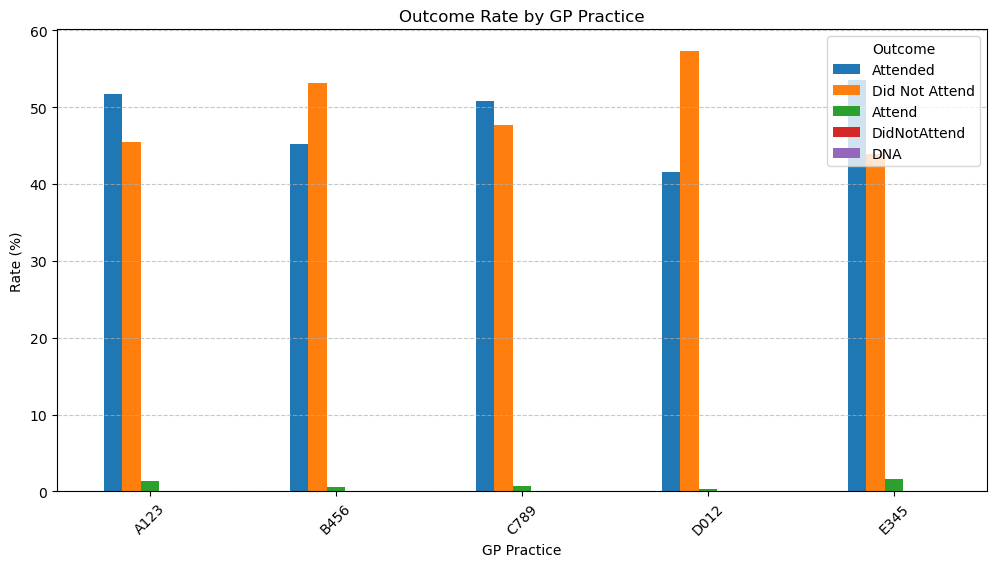

✅ Chart saved as 'images/Outcome_Rate_by_GP_Practice.png'


In [23]:
# Combine into a single dataframe for plotting
outcome_rates = pd.DataFrame({
    'Attended': attended_rate,
    'Did Not Attend': did_not_attend_rate,
    'Attend': attend_rate,
    'DidNotAttend': did_not_attend_alt_rate,
    'DNA': dna_rate
})

# Plot the bar chart
outcome_rates.plot(kind='bar', figsize=(12, 6))
plt.title('Outcome Rate by GP Practice')
plt.ylabel('Rate (%)')
plt.xlabel('GP Practice')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#Save and show
file_name = 'Outcome Rate by GP Practice'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")


In [24]:

# Group by Diagnosis and calculate descriptive statistics for Age
age_distribution = df_cleaned.groupby('Diagnosis')['Age'].agg(
    Mean='mean', Median='median', Min='min', Max='max'
)

# Calculate age range
age_distribution['Range'] = age_distribution['Max'] - age_distribution['Min']

# Format results (optional)
age_distribution = age_distribution.round(2)  # Show two decimal places

# Display results
print("\n📊 Age Distribution by Diagnosis:")
print(age_distribution)


📊 Age Distribution by Diagnosis:
               Mean  Median   Min   Max  Range
Diagnosis                                     
Asthma        51.69    50.0  18.0  89.0   71.0
Diabetes      54.67    55.0  18.0  89.0   71.0
Hypertension  53.67    54.0  18.0  89.0   71.0
Unknown       26.00    26.0  26.0  26.0    0.0


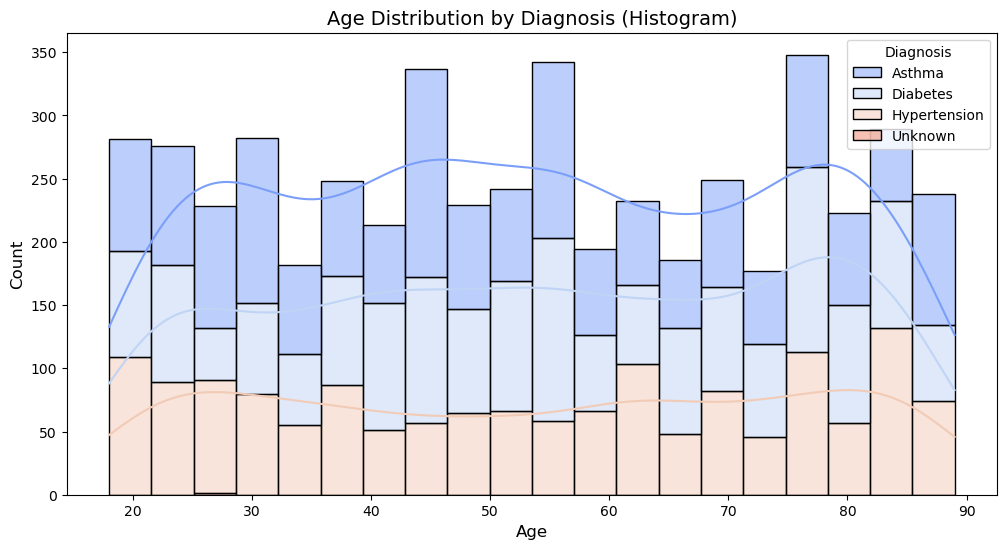

✅ Chart saved as 'images/Age_Distribution_by_Diagnosis_(Histogram).png'


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create histogram with multiple categories using 'hue'
sns.histplot(data=df_cleaned, x='Age', hue='Diagnosis', multiple='stack', bins=20, palette='coolwarm', kde=True)

# Labels and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Age Distribution by Diagnosis (Histogram)", fontsize=14)

#Save and show
file_name = 'Age Distribution by Diagnosis (Histogram)'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")


In [26]:
# Count of Male and Female for each Diagnosis
gender_counts = df_cleaned.groupby(['Diagnosis', 'Gender']).size().unstack(fill_value=0)

# Convert counts to proportions
gender_proportion = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100  

# Display results
print("Proportion of Male and Female Patients by Diagnosis:\n", gender_proportion)

Proportion of Male and Female Patients by Diagnosis:
 Gender                 F          M
Diagnosis                          
Asthma         48.321759  51.678241
Diabetes       49.281196  50.718804
Hypertension   57.264398  42.735602
Unknown       100.000000   0.000000


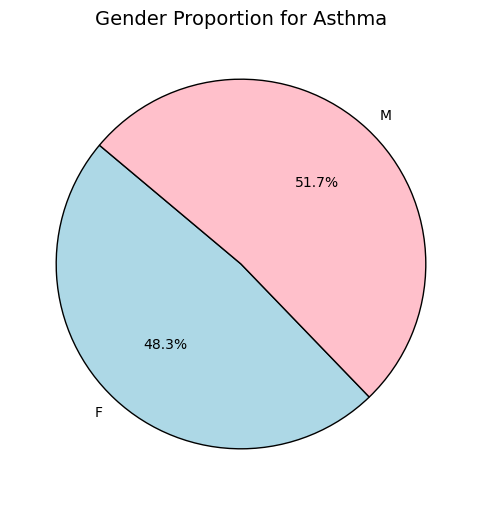

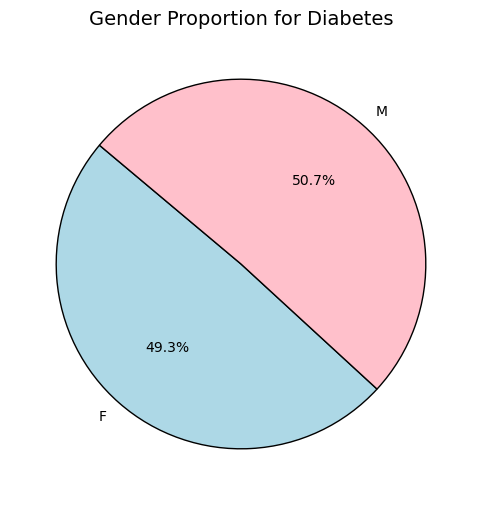

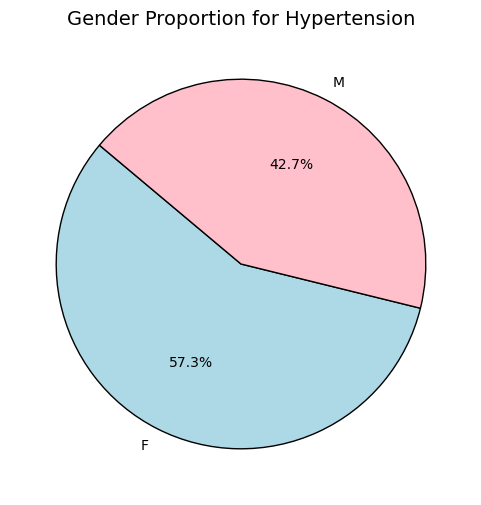

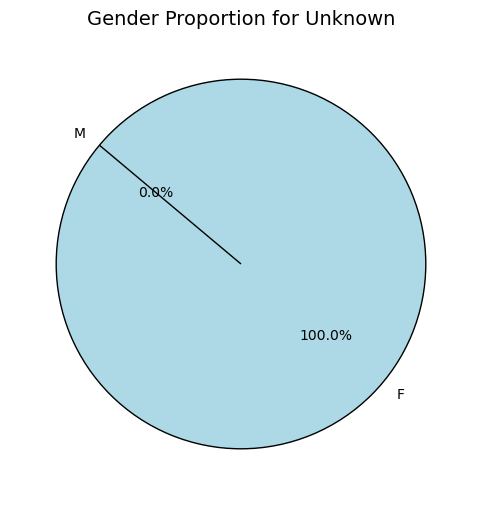

✅ Chart saved as 'images/gender_proportion_by_Diagnosis.png'


In [27]:
import matplotlib.pyplot as plt

# Create pie charts for each diagnosis
for diagnosis in gender_proportion.index:
    plt.figure(figsize=(6, 6))  # Set figure size
    
    # Get data for the specific diagnosis
    labels = gender_proportion.columns  # Male, Female
    sizes = gender_proportion.loc[diagnosis]  # Corresponding proportions
    
    # Create pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=140, wedgeprops={'edgecolor': 'black'})
    
    # Title
    plt.title(f"Gender Proportion for {diagnosis}", fontsize=14)
    
   #Save and show
file_name = 'gender proportion by Diagnosis'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")
 

DATA CLEANING BEFORE PREDICTION

In [28]:
# Fix inconsistent labels and classify into "Missed" or "Attended"
df_cleaned['OutcomeClass'] = df_cleaned['Outcome'].replace({
    'Attend': 'attended',
    'Didnotattend': 'missed',
    'Dna': 'missed',
    'Did Not Attend': 'missed',
    'Attended': 'attended'
})

# Drop invalid/missing rows
df_clean = df_cleaned.dropna(subset=['OutcomeClass'])

# Create binary target: 1 = missed, 0 = attended
df_clean['MissedAppointment'] = df_clean['OutcomeClass'].apply(lambda x: 1 if x == 'missed' else 0)

# Check the cleaned data
print("OutcomeClass value counts:\n", df_clean['OutcomeClass'].value_counts())
print(df_clean[['Outcome', 'OutcomeClass', 'MissedAppointment']].head())


OutcomeClass value counts:
 missed      2527
attended    2469
Name: OutcomeClass, dtype: int64
          Outcome OutcomeClass  MissedAppointment
0  Did Not Attend       missed                  1
1        Attended     attended                  0
2        Attended     attended                  0
3        Attended     attended                  0
4        Attended     attended                  0


In [29]:
print(df_clean['Outcome'])

0       Did Not Attend
1             Attended
2             Attended
3             Attended
4             Attended
             ...      
4995          Attended
4996          Attended
4997    Did Not Attend
4998          Attended
4999    Did Not Attend
Name: Outcome, Length: 4996, dtype: object


In [30]:
print("\nUnique Outcomes After Cleaning:", df_cleaned['OutcomeClass'].unique())


Unique Outcomes After Cleaning: ['missed' 'attended']


In [31]:
#Select relevant features for the predictive model
model_df = df_clean[['Age', 'Diagnosis', 'GPPractice', 'Gender', 'MissedAppointment']]

In [32]:
# Encode categorical variables for modeling
model_df = pd.get_dummies(model_df, columns=['Diagnosis', 'GPPractice', 'Gender'], drop_first=True)


In [33]:
#  Split data into features and target
X = model_df.drop('MissedAppointment', axis=1)
y = model_df['MissedAppointment']


In [34]:

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1998, 9)
y_train shape: (1998,)
X_test shape: (2998, 9)
y_test shape: (2998,)


In [35]:
#  Standardize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [36]:
# Feature Selection (Variance Threshold)
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train_scaled)
X_test_fs = variance_selector.transform(X_test_scaled)

print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")


1 features have been removed, 8 features remain


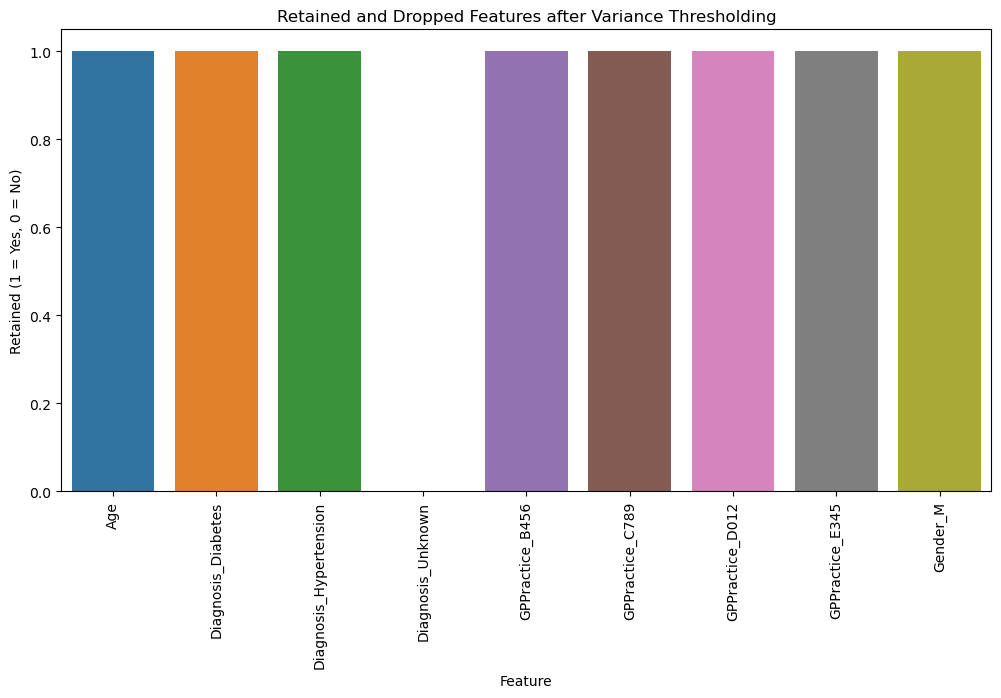

✅ Chart saved as 'images/Retained_and_Dropped_Features_after_Variance_Thresholding.png'


In [37]:
# Visualize Retained and Dropped Features
selected_mask = variance_selector.get_support()
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Retained': selected_mask.astype(int)
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Retained', data=features_df)
plt.xticks(rotation=90)
plt.title('Retained and Dropped Features after Variance Thresholding')
plt.ylabel('Retained (1 = Yes, 0 = No)')
plt.xlabel('Feature')
#Save and show
file_name = 'Retained and Dropped Features after Variance Thresholding'
file_path = f'images/{file_name.replace(" ", "_")}.png'
plt.savefig(file_path)
plt.show()
print(f"✅ Chart saved as '{file_path}'")




KNN Model Performance:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1482
           1       0.74      0.76      0.75      1516

    accuracy                           0.74      2998
   macro avg       0.74      0.74      0.74      2998
weighted avg       0.74      0.74      0.74      2998



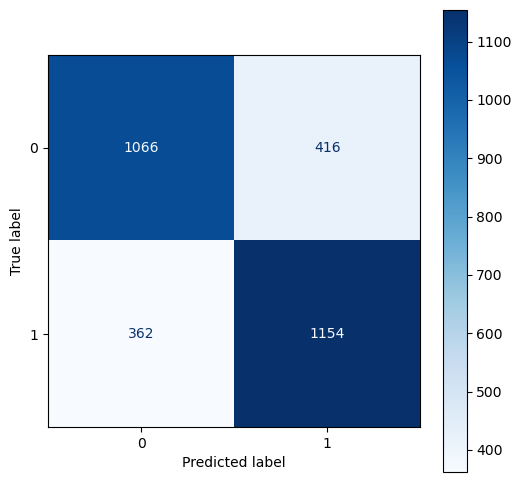

✅ Confusion matrix saved as 'images/KNN_Confusion_Matrix.png'


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

# Ensure images folder exists
if not os.path.exists('images'):
    os.makedirs('images')

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("\nKNN Model Performance:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot and save
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)
file_name = 'KNN_Confusion_Matrix'
file_path = f'images/{file_name}.png'
fig.savefig(file_path, bbox_inches='tight')
plt.show()
print(f"✅ Confusion matrix saved as '{file_path}'")



Decision Tree Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1482
           1       0.70      0.74      0.72      1516

    accuracy                           0.71      2998
   macro avg       0.71      0.71      0.71      2998
weighted avg       0.71      0.71      0.71      2998

Confusion Matrix:
[[ 995  487]
 [ 389 1127]]


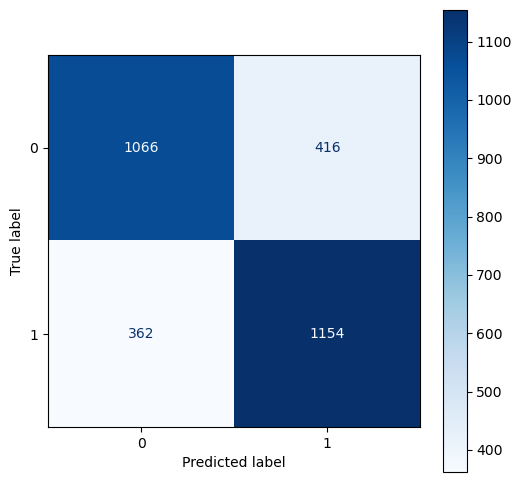

✅ Confusion matrix saved as 'images/Decision Tree Model Performance.png'


In [39]:

# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=2)  # Default settings
dt.fit(X_train_fs, y_train)
y_pred_dt = dt.predict(X_test_fs)

# Evaluate Decision Tree Model
print("\nDecision Tree Model Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
# Plot and save
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)
file_name = 'Decision Tree Model Performance'
file_path = f'images/{file_name}.png'
fig.savefig(file_path, bbox_inches='tight')
plt.show()
print(f"✅ Confusion matrix saved as '{file_path}'")


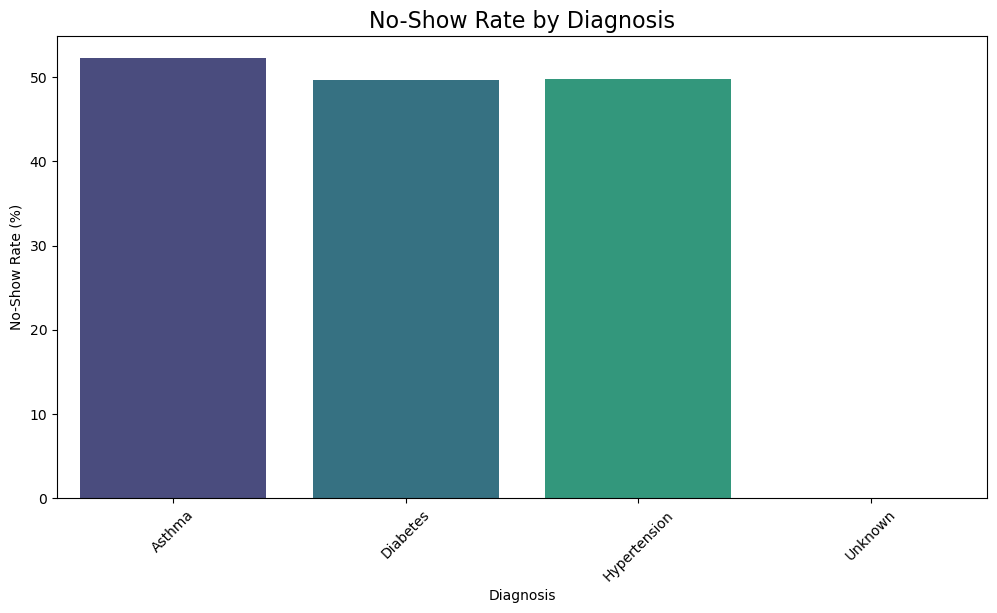

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. No-Show Rates by Diagnosis
no_show_rate_by_diagnosis = df_clean.groupby('Diagnosis')['MissedAppointment'].mean() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=no_show_rate_by_diagnosis.index, y=no_show_rate_by_diagnosis.values, palette='viridis')
plt.title('No-Show Rate by Diagnosis', fontsize=16)
plt.ylabel('No-Show Rate (%)')
plt.xlabel('Diagnosis')
plt.xticks(rotation=45)
plt.show()

# 2. Distribution of Appointments Over Time (Optional: Create a date column if available)


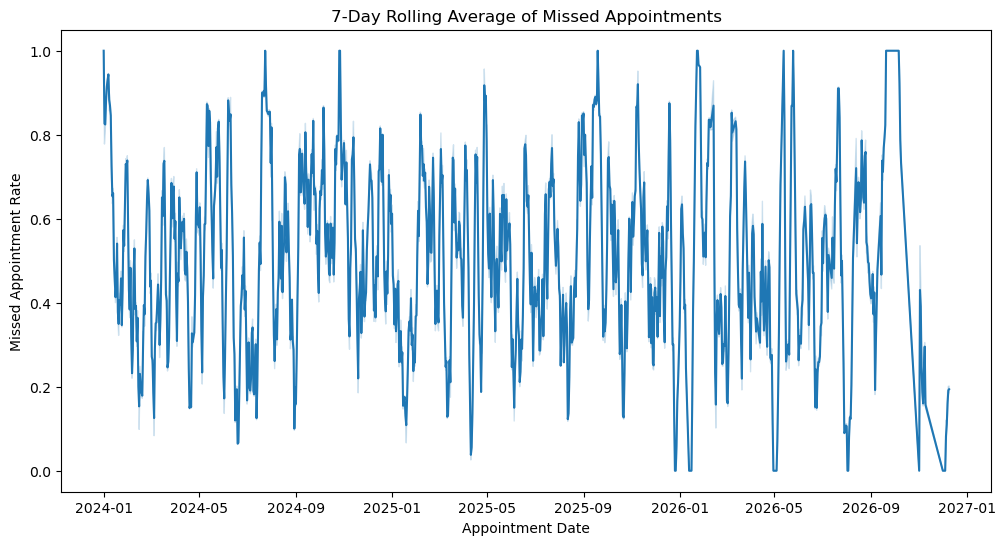

✅ Chart saved as 'images/7-Day_Rolling_Average_Missed_Appointments.png'


In [41]:
# Ensure data is sorted by date
df_clean = df_clean.sort_values('AppointmentDate')

# Compute rolling mean only for numeric column
rolling_data = df_clean[['AppointmentDate', 'MissedAppointment']].rolling('7D', on='AppointmentDate').mean()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='AppointmentDate', y='MissedAppointment', data=rolling_data)
plt.title('7-Day Rolling Average of Missed Appointments')
plt.xlabel('Appointment Date')
plt.ylabel('Missed Appointment Rate')

# Save chart
file_name = '7-Day_Rolling_Average_Missed_Appointments'
file_path = f'images/{file_name}.png'
plt.savefig(file_path, bbox_inches='tight')
plt.show()
print(f"✅ Chart saved as '{file_path}'")
